In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



#units=[500,780,790,1000,5000]#,10000]




def load_training_data(n_exp=6,
                    n_epochs=100,
                    folder="exp-7n/",
                    units=[10,50,150,500,1000]#[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 780, 790]
                      ):

        terminal=[]
        un=[]
        data={}
        
        for c,hidden_units in enumerate(units):
            arrs=[]
            for i in range(n_exp):
                arr=np.load(folder+"c5u"+str(hidden_units)+"-"+str(i)+".npy")    
                if len(arr) > n_epochs:
                    arr=arr[:n_epochs]
                arrs.append(arr)
            print(arr.shape,i,hidden_units)
            loss=np.mean(arrs,axis=0)
            terminal.append(loss[-1])
            un.append(hidden_units)

            data[str(hidden_units)]=loss
        return data, {"terminal":terminal, "units":un}
    
def plot_train(data,folder):
    fig=plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111)
    number_of_plots=len(data.keys())
    colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
    colors = [colormap(i) for i in np.linspace(0, 1,number_of_plots)]
    ax1.set_prop_cycle('color', colors)
    for key,value in data.items():
        ax1.semilogy(value,label=key)
        print(len(value))
    ax1.legend()
    plt.savefig(folder+"train_means.png")
    plt.show()
    
def convergence_plot(convergences,folder="exp3/",log=False):
    fig=plt.figure(figsize=(10,6))
    un=convergences["units"]
    terminal=convergences["terminal"]
    if log:
        plt.semilogy(un,terminal,marker="*")
    else:
        plt.plot(un,terminal,marker="*")
    plt.savefig(folder+"convergence_means.png")
    
    plt.show()


In [2]:
folder="exp3/"
data,convergences=load_training_data(folder=folder,n_exp=1)
plot_train(data,folder)
convergence_plot(convergences,folder=folder, log=True)

FileNotFoundError: [Errno 2] No such file or directory: 'exp7/c5u10-0.npy'

(100,) 0 10
(100,) 0 50
(100,) 0 150
(100,) 0 500
(100,) 0 1000
100
100
100
100
100


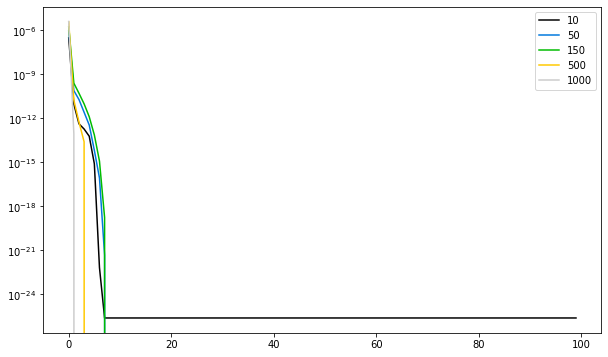

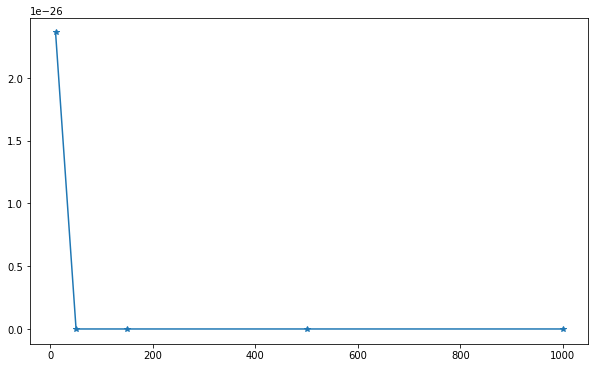

In [40]:
folder="exp4/"
data,convergences=load_training_data(units=[10,50,150,500,1000],folder=folder,n_exp=1)
plot_train(data,folder)
convergence_plot(convergences,folder=folder)

(100,) 4 10
(100,) 4 50
(100,) 4 150
(100,) 4 500
(100,) 4 1000
100
100
100
100
100


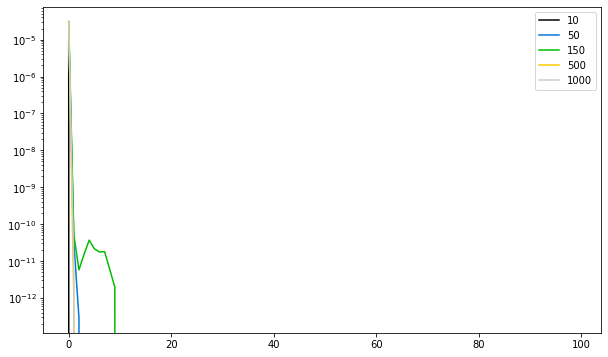

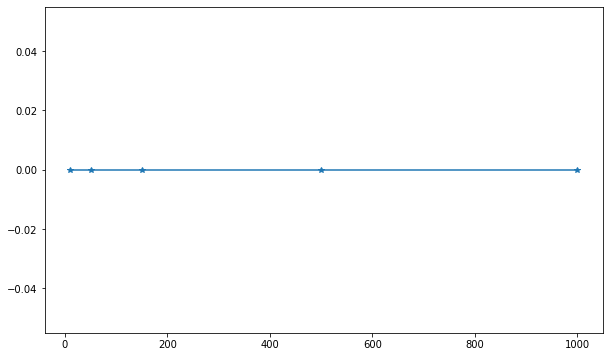

In [53]:
folder="exp5/"
data,convergences=load_training_data(units=[10,50,150,500,1000],folder=folder)
plot_train(data,folder)
convergence_plot(convergences,folder=folder)

(100,) 5 10
(100,) 5 50
(100,) 5 150
(100,) 5 500
100
100
100
100


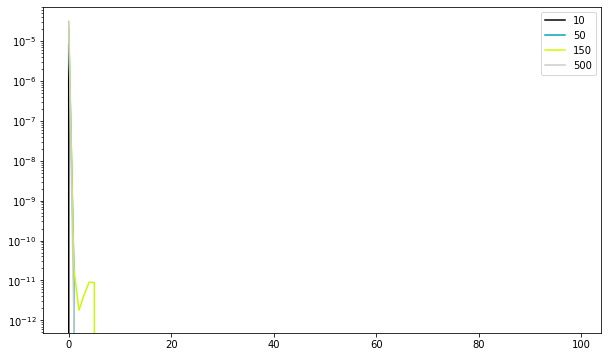

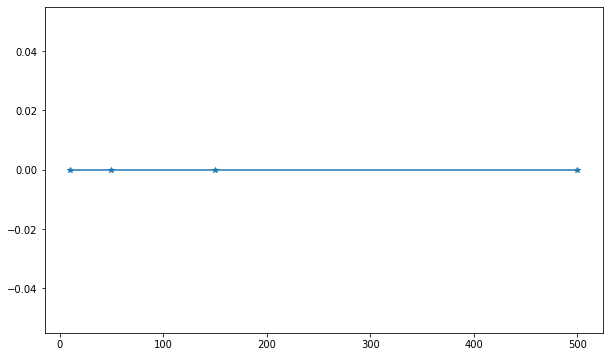

In [4]:
folder="exp-7/"
data,convergences=load_training_data(units=[10,50,150,500],folder=folder,n_exp=6)
plot_train(data,folder)
convergence_plot(convergences,folder=folder)

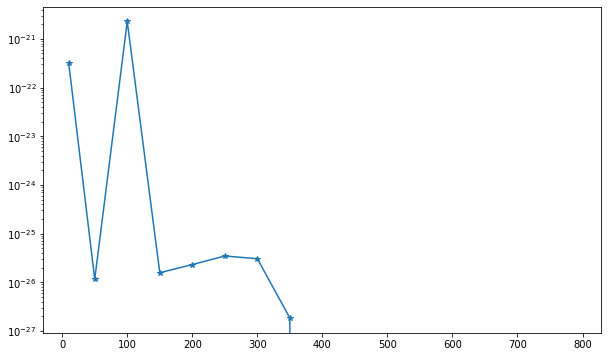